In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.shape

(614, 13)

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.shape

(480, 13)

In [11]:
df.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
df = df.replace(to_replace = '3+',value=4)

In [15]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

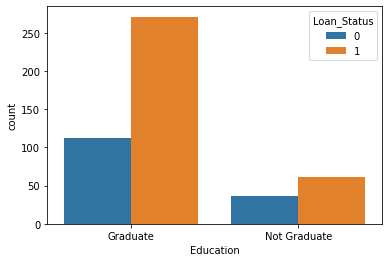

In [16]:
sns.countplot(x='Education',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

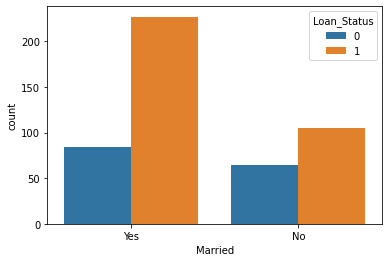

In [17]:
sns.countplot(x='Married',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

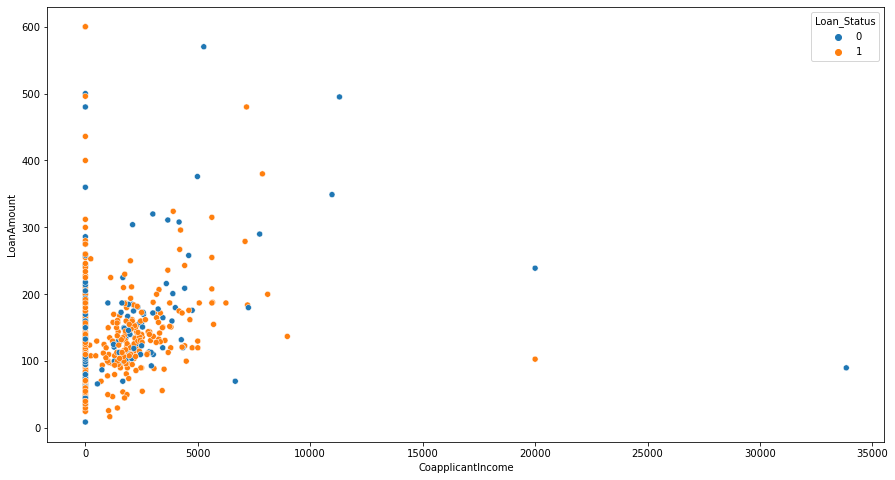

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status')

In [19]:
df.replace({'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
           'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,No,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,Yes,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [21]:
df.replace({'Married':{'Yes':1,'No':0}},inplace=True)

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [23]:
df=df.drop('Loan_ID',axis=1)

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [25]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [26]:
# print(X)
# print(y)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC(kernel="linear")

In [31]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [32]:
pred_test = model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
print(classification_report(pred_test,y_test))
print(confusion_matrix(pred_test,y_test))
print(accuracy_score(pred_test,y_test))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61         7
           1       1.00      0.78      0.88        41

    accuracy                           0.81        48
   macro avg       0.72      0.89      0.74        48
weighted avg       0.92      0.81      0.84        48

[[ 7  0]
 [ 9 32]]
0.8125


In [49]:
input_data= (1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)

arr = np.asarray(input_data)

arr_reshaped=arr.reshape(1,-1)

prediction = model.predict(arr_reshaped)

print(prediction)

if (prediction[0]==1):
    print("Loan cannot be approved")
else:
    print("Loan can be approved")

[1]
Loan cannot be approved


In [50]:
input_data=(1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2)

arr = np.asarray(input_data)

arr_reshaped=arr.reshape(1,-1)

prediction = model.predict(arr_reshaped)

print(prediction)

if (prediction[0]==1):
    print("Loan can be approved")
else:
    print("Loan cannot be approved")

[1]
Loan can be approved


In [52]:
input_data=(1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2)

arr = np.asarray(input_data)

arr_reshaped=arr.reshape(1,-1)

prediction = model.predict(arr_reshaped)

print(prediction)

if (prediction[0]==1):
    print("Loan can be approved")
else:
    print("Loan cannot be approved")

[1]
Loan can be approved


In [54]:
input_data=(0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1)

arr = np.asarray(input_data)

arr_reshaped=arr.reshape(1,-1)

prediction = model.predict(arr_reshaped)

print(prediction)

if (prediction[0]==1):
    print("Loan can be approved")
else:
    print("Loan cannot be approved")

[0]
Loan cannot be approved
